# Naive Bayes
[Chi tiết](https://machinelearningcoban.com/2017/08/08/nbc/)

Sử dụng lý thuyết bayes, đánh giá xác xuất có điều kiện `P(Y=n | X = xi)` thể hiện xác suất rơi vào từng class của `xi` với `xi` là 1 quan sát, `n` là 1 trong các class của Y. 
$$P(Y=i|X_{1},X_{2},\ldots,X_{p}) =\frac{P(Y=i)P(X_{1}|Y=i)...P(X_{p}|Y=i)}{P(Y=0)P(X_{1}|Y=0)...P(X_{p}|Y=0) + P(Y=1)P(X_{1}|Y=1)...P(X_{p}|Y=1)}$$
Trong đó:
- X được giả sử là independence
- Posterior probability: Xác suất Y=i given predictor infomation
- Prior probability: Xác suất Y=i not talking about predictor infomation

NB Chỉ phù hợp với dữ liệu categorical features and output, nếu muốn áp dụng cho dữ liệu numeric thì cần thực hiện 1 trong 2 cách:
- Bin và convert numerical features to category
- Use a probability model to estimate the conditional probability. Ví dụ, giả định theo phân phối normal thì sẽ tính được P(Xj | Y=i )

**Tóm tắt**
- Naive Bayes Classifiers (NBC) thường được sử dụng trong các bài toán __Text Classification__.
- NBC có thời gian training và test rất nhanh. Điều này có được là do giả sử về tính độc lập giữa các thành phần, nếu biết class.
- Nếu giả sử về tính độc lập được thoả mãn (dựa vào bản chất của dữ liệu), NBC được cho là cho kết quả tốt hơn so với SVM và logistic regression khi có ít dữ liệu training.
- NBC có thể hoạt động với các feature vector mà một phần là liên tục (sử dụng Gaussian Naive Bayes), phần còn lại ở dạng rời rạc (sử dụng Multinomial hoặc Bernoulli).
- Khi sử dụng Multinomial Naive Bayes, Laplace smoothing thường được sử dụng để tránh trường hợp 1 thành phần trong test data chưa xuất hiện ở training data.

**Phân loại các phân phối Naive Bayes**

## Gaussian Naive Bayes
- Mô hình này được sử dụng chủ yếu trong loại dữ liệu mà các feature là các biến liên tục, Giả sử với mỗi chiều dữ liệu dữ liệu `i` và 1 class `c`, $x_i$ tuân theo phân phối Normal:
$$p(x_{i}|c)=p(x_{i}|\mu_{c i},\sigma_{c i}^{2})=\frac{1}{\sqrt{2\pi\sigma_{c i}^{2}}}\mathrm{exp}\left(-\frac{(x_{i}-\mu_{c i})^{2}}{2\sigma_{c i}^{2}}\right)$$
Trong đó các tham số $\mu_{c i}$, $\sigma_{c i}^{2}$ được ước lượng theo MLE

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      1.00      0.94        30
           2       1.00      0.83      0.91        24

    accuracy                           0.95        75
   macro avg       0.96      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75



## Multinomial Naive Bayes
Mô hình này chủ yếu được sử dụng trong phân loại văn bản mà feature vectors được tính bằng __Bags of Words__. Lúc này, mỗi văn bản được biểu diễn bởi một vector có độ dài `d` chính là số từ trong từ điển. Giá trị của thành phần thứ `i` trong mỗi vector chính là số lần từ thứ `i` xuất hiện trong văn bản đó. Ta tính xác suất $p(x_i|c)$:
$$\lambda_{c_i}=p(x_{i}|c)=\frac{N_{c_i} + \alpha }{N_{c} + d\alpha}$$
Trong đó:
- $N_{c_i}$ là tổng số lần từ thứ `i` xuất hiện trong văn bản được phân loại là class `c`, hay nói cách khác là tổng số lần xuất hiện của từ `i` trong class c
- $N_{c}$ là tổng số từ (tính cả lặp) xuất hiện trong class c
- $\alpha$ thường = 1, là laplace smoothing để khắc phục TH class c mới trong lúc test, nhưng ko có trong train

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib. pyplot as plt
def plot_cm(y_test, y_test_pred, labels = None):
    cm = confusion_matrix(y_test, y_test_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot()
    plt.grid(False)

In [74]:
# **Bài toán phân loại email spam**
# Mỗi quan sát là thể hiện số lượng từ thứ i trong email đó, và is_spam là label có phải là spam hay không ?

data = pd.read_csv(r'Datasets/email_spam_classification/email.csv', index_col=[0])

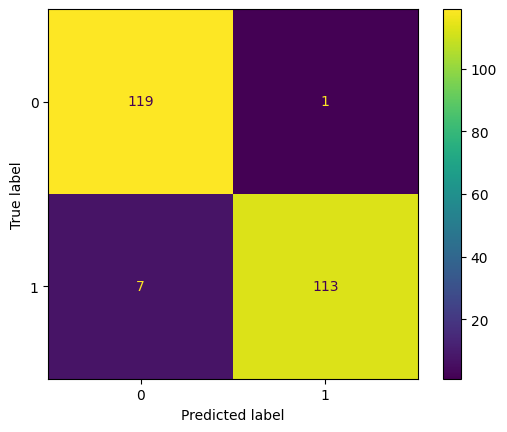

In [75]:
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(data.drop('is_spam', axis =1 ), 
                                                    data['is_spam'], 
                                                    stratify=data['is_spam'], 
                                                    shuffle=True)
clf = MultinomialNB().fit(X_train, y_train)
plot_cm(y_test, clf.predict(X_test))

## Bernoulli Naive Bayes
Mô hình này được áp dụng cho các loại dữ liệu mà mỗi thành phần là một giá trị binary - bẳng 0 hoặc 1. Ví dụ: cũng với loại văn bản nhưng thay vì đếm tổng số lần xuất hiện của 1 từ trong văn bản, ta chỉ cần quan tâm từ đó có xuất hiện hay không.
Ta tính:
$$p(x_{i}|c)=p(i|c)^{x_{i}}(1-p(i|c)^{1-x_{i}}$$
Trong đó $p(i|c)$ có thể được hiểu là xác suất từ thứ `i` xuất hiện trong các văn bản của class `c`.

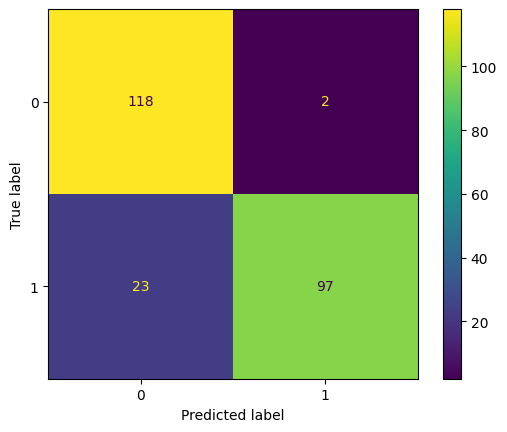

In [49]:
from sklearn.naive_bayes import BernoulliNB
X_train, X_test, y_train, y_test = train_test_split((data.drop('is_spam', axis =1 )>0).astype(int), 
                                                    (data['is_spam']>0).astype(int), 
                                                    stratify=data['is_spam'], 
                                                    shuffle=True)
clf = BernoulliNB().fit(X_train, y_train)
plot_cm(y_test, clf.predict(X_test))

## Categorical Naive Bayes
Phù hợp với bài toán classification cho data category features

In [ ]:
from sklearn.naive_bayes import CategoricalNB
X_train, X_test, y_train, y_test = train_test_split(data.drop('is_spam', axis =1 ), 
                                                    data['is_spam'], 
                                                    stratify=data['is_spam'], 
                                                    shuffle=True)
clf = CategoricalNB().fit(X_train, y_train)
plot_cm(y_test, clf.predict(X_test))